In [180]:
import spike.spike_analysis.spike_collection as sc
import spike.spike_analysis.spike_recording as sr
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.normalization as norm
import spike.spike_analysis.single_cell as single_cell
import spike.spike_analysis.spike_collection as collection
import spike.spike_analysis.zscoring as zscoring
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import os
import behavior.boris_extraction as boris
import matplotlib.pyplot as plt
import pickle
import re
import ast
import importlib

Seems that we have different days for the same subject, maybe we can look to see if across days do neurons spiking patterns change in all subjects? Does it change for subjects that win more?

In [181]:
pd.set_option('display.max_colwidth', 0)  # 0 means unlimited in newer pandas versions

# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Don’t truncate column contents
pd.set_option("display.max_colwidth", None)

# Expand the display to the full width of the screen
pd.set_option("display.width", 0)


In [182]:
df_path = r"C:\Users\thoma\Code\ResearchCode\diff_fam_social_memory_ephys\other_peoples_sutff\Thomas\reward_comp\outputs\zscores_event_specific_standardway_all.csv"

In [183]:
# 1) Read
units_df = pd.read_csv(df_path)
units_df.head(30)

,Recording,Event name,Unit number,Pre-event M,Pre-event SD,Event M,Event Z-Score,sig,Event windows
0,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,104,0.075,0.098058,0.075,0.000000,not sig,40
1,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,11,0.250,0.263117,0.270,0.076012,not sig,40
2,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,122,0.060,0.103280,0.185,1.210307,not sig,40
3,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,125,0.745,0.441414,0.690,-0.124600,not sig,40
4,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,126,4.010,1.378182,3.215,-0.576847,not sig,40
5,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,130,0.055,0.119722,0.105,0.417635,not sig,40
6,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,143,0.850,0.361620,0.970,0.331840,not sig,40
7,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,147,0.030,0.072324,0.060,0.414800,not sig,40
8,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,158,0.190,0.230718,0.570,1.647033,not sig,40
9,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,189,1.855,0.554677,1.815,-0.072114,not sig,40


In [214]:
all_units = pd.read_csv(df_path)

In [184]:
units_df = units_df[units_df['sig'] != 'not sig']
units_df = units_df.drop(["Pre-event M", "Pre-event SD", "Event M"], axis=1)

In [185]:
df = units_df.copy()
event_df = df[df['Event name'] == 'high_comp_win']

significant_units = event_df['Unit number'].unique()
print(f"Number of significant units for high_comp_win: {len(significant_units)}")

Number of significant units for high_comp_win: 22


In [186]:
units_df.columns

Index(['Recording', 'Event name', 'Unit number', 'Event Z-Score', 'sig',
       'Event windows'],
      dtype='object')

In [187]:
units_df.head(10)

,Recording,Event name,Unit number,Event Z-Score,sig,Event windows
15,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,232,3.047514,increase,40
59,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp,232,1.668002,increase,9
62,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp,65,1.878280,increase,9
78,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp_lose,211,1.835667,increase,1
125,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp_win,232,1.897931,increase,8
323,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,win,232,2.498572,increase,13
330,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,12,3.142302,increase,40
331,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,15,-2.199950,decrease,40
336,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,52,19.119122,increase,40
339,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,68,9.742588,increase,40


### Integrate Putative Types | get csv with putative types and dataframe here and combine them

Using functions from venn_upset_plot_creation.py that allow us to create venn and upset plots as well as find overlapping sig neurons per event

In [188]:
# using os to use functions from this py file C:\Users\thoma\Code\ResearchCode\diff_fam_social_memory_ephys\other_peoples_sutff\Thomas\reward_comp\venn_upset_plot_creation.py
import os
import sys
module_path = r"C:/Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp"
sys.path.append(module_path)

from venn_upset_plot_creation import create_venn_diagram, analyze_event_overlap, create_overlap_visualization

In [189]:
# use importlib to reload venn_upset_plot_creation if we make changes to it
import importlib
importlib.reload(sys.modules['venn_upset_plot_creation'])

<module 'venn_upset_plot_creation' from 'C:\\Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp\\venn_upset_plot_creation.py'>

EXAMPLE 1: Alone Rewarded vs Win vs Lose Events
Significant units for increase: [232, 12, 52, 68, 481, 513, 10, 107, 181, 190, 34, 4, 44, 6, 104, 108, 23, 64, 80, 136, 3, 183, 25]
Significant units for decrease: [15, 38, 403, 12, 195, 33, 111, 7, 13, 18]
All significant units: [232, 12, 15, 52, 68, 38, 403, 481, 513, 10, 107, 12, 181, 190, 195, 33, 34, 4, 44, 6, 104, 108, 111, 23, 64, 7, 80, 136, 13, 3, 183, 25, 18]
alone_rewarded: 33 significant units
Significant units for increase: [232, 52, 61, 481, 118, 102, 104, 108, 23, 64, 59, 19, 187, 272, 274, 7, 82, 84, 90, 101, 113, 158, 166, 248, 106, 101, 47, 101, 183, 24]
Significant units for decrease: [14, 46, 33, 13, 4]
All significant units: [232, 52, 61, 14, 481, 118, 102, 104, 108, 23, 64, 59, 19, 187, 272, 274, 7, 82, 84, 90, 101, 46, 33, 113, 158, 166, 248, 106, 13, 101, 47, 101, 183, 4, 24]
win: 35 significant units
Significant units for increase: [14, 107, 20, 4, 6, 80, 180, 108, 109, 103, 19, 187, 263, 272, 274, 275, 82, 84, 87

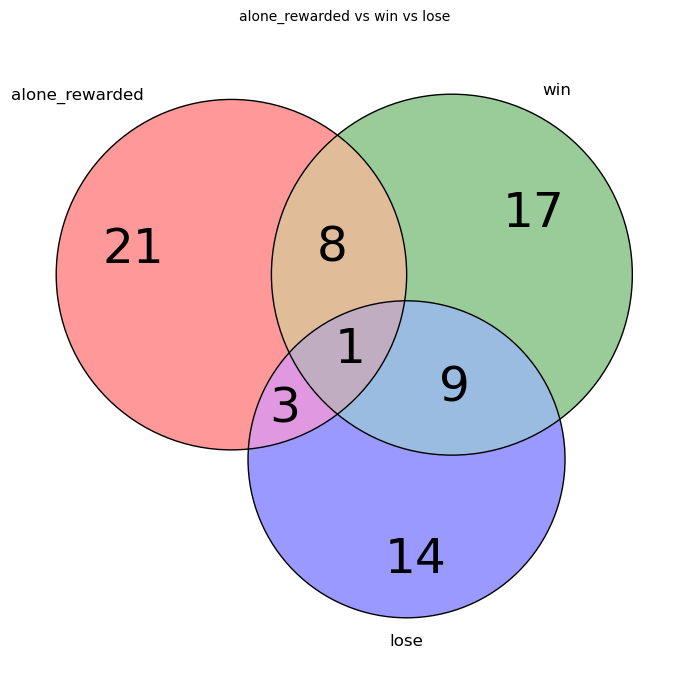

In [190]:
# Example 1: Compare 'alone_rewarded', 'win', and 'lose' events (your specific example)
print("EXAMPLE 1: Alone Rewarded vs Win vs Lose Events")
events_to_compare = ['alone_rewarded', 'win', 'lose']
_ = create_venn_diagram(units_df, events_to_compare, significance_type='both', 
                        title="All Significant Units");

In [191]:
hc_df = units_df[units_df['Event name'] == 'high_comp_win'].copy()
hc_df.head()
print(len(hc_df))

25


### Problem, even though it says both for sig type it only have increase

In [192]:
hc_df_increasing = hc_df[hc_df['sig'] == 'increase']
hc_df_decreasing = hc_df[hc_df['sig'] == 'decrease']

print(f"Number of increasing units for high_comp_win: {len(hc_df_increasing)}")
print(f"Number of decreasing units for high_comp_win: {len(hc_df_decreasing)}")

Number of increasing units for high_comp_win: 21
Number of decreasing units for high_comp_win: 4


In [193]:
significant_units = hc_df[hc_df['sig'].isin(['increase', 'decrease'])]['Unit number'].unique()
print(f"Number of significant units for high_comp_win: {len(significant_units)}")


Number of significant units for high_comp_win: 22


Significant units for increase: [52, 61, 479, 513, 102, 108, 187, 272, 274, 7, 82, 84, 98, 8, 24]
Significant units for decrease: [14, 33, 38, 13]
All significant units: [52, 61, 14, 479, 513, 102, 108, 187, 272, 274, 7, 82, 84, 33, 38, 98, 13, 8, 24]
low_comp_win: 19 significant units
Significant units for increase: [21, 187, 272, 262, 3, 4, 7]
Significant units for decrease: []
All significant units: [21, 187, 272, 262, 3, 4, 7]
low_comp_lose: 7 significant units
Significant units for overlap: {'20230619_subj_1-4_t3b3L_box2_Unit272', '20230619_subj_1-4_t3b3L_box2_Unit187'}

Overlap between low_comp_win and low_comp_lose: 2 units
units in low_comp_win: {'20230616_subj_1-4_t4b3L_box1_Unit108', '20230621_subj_1-4_t3b3L_box1_Unit84', '20230613_subj_1-1_t1b2L_box1_Unit479', '20230612_subj_1-2_t2b2L_box1_Unit14', '20230612_subj_1-4_t4b2L_box1_Unit61', '20230619_subj_1-4_t3b3L_box2_Unit187', '20240320_subj_4-3_t5b5_Unit13', '20230621_subj_1-4_t3b3L_box1_Unit82', '20230612_subj_1-4_t4b2L_box

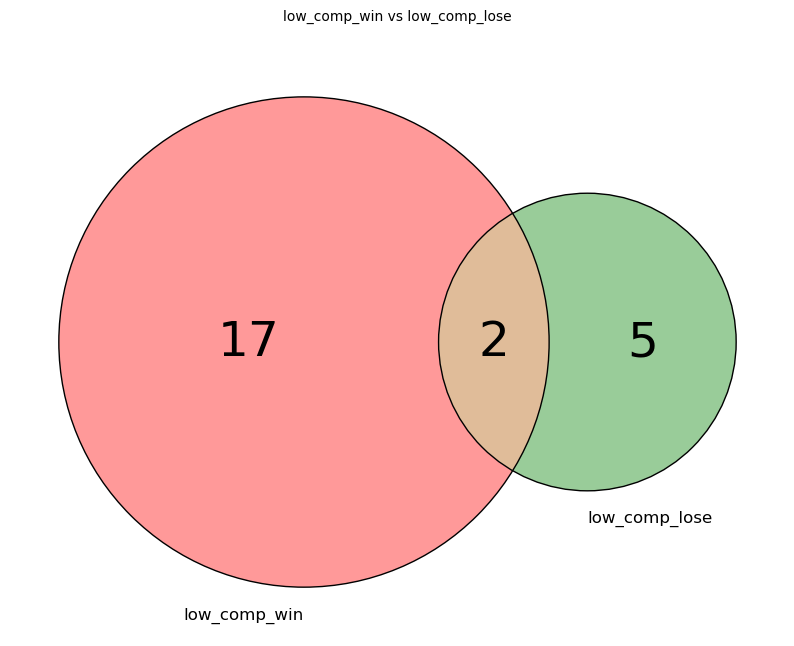

In [194]:
_ = create_venn_diagram(units_df, ['low_comp_win', 'low_comp_lose'], significance_type='both');


EXAMPLE 2: High Competition Win vs Lose
Significant units for increase: [232, 52, 86, 118, 6, 23, 53, 64, 59, 19, 90, 101, 113, 158, 166, 248, 106, 101, 47, 101, 4]
Significant units for decrease: [33, 62, 8, 4]
All significant units: [232, 52, 86, 118, 6, 23, 53, 64, 59, 19, 90, 101, 33, 113, 158, 166, 248, 106, 62, 101, 47, 8, 101, 4, 4]
high_comp_win: 25 significant units
Significant units for increase: [211, 52, 107, 20, 4, 6, 80, 108, 109, 23, 5, 76, 103, 19, 87, 187, 263, 272, 274, 275, 17, 82, 84, 87, 101, 23, 6, 4, 75]
Significant units for decrease: [262, 36, 80]
All significant units: [211, 52, 107, 20, 4, 6, 80, 108, 109, 23, 5, 76, 103, 19, 87, 187, 262, 263, 272, 274, 275, 17, 36, 82, 84, 87, 101, 23, 6, 4, 80, 75]
high_comp_lose: 32 significant units
Significant units for overlap: {'20240317_subj_4-3_t5b5_Unit101', '20240323_subj_3-1_t5b5_Unit4', '20230618_subj_1-4_t4b3L_box1_Unit19', '20230612_subj_1-4_t4b2L_box1_Unit52', '20230614_subj_1-1_t1b3L_box1_Unit6', '20230616_

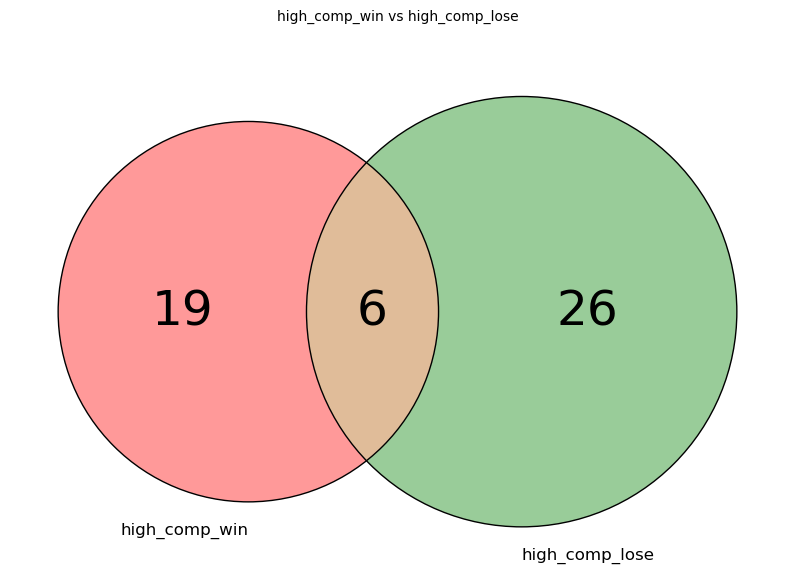

In [195]:
# Example 2: Compare high competition win vs lose (2-way comparison)
print("\nEXAMPLE 2: High Competition Win vs Lose")
high_comp_events = ['high_comp_win', 'high_comp_lose']
_ = create_venn_diagram(units_df, high_comp_events, significance_type='both');

In [217]:
from upsetplot import from_contents, UpSet
import matplotlib.pyplot as plt
def create_upset_plot(units_df, events, significance_type='both', title="UpSet Plot"):
    """
    Create an UpSet plot for given events using unique neuron identifiers.
    """
    # Build event_sets with your existing identifier logic
    event_sets = {}
    for event in events:
        event_df = units_df[units_df['Event name'] == event]

        if significance_type == 'both':
            filtered_df = event_df[event_df['sig'].isin(['increase', 'decrease'])]
        else:
            filtered_df = event_df[event_df['sig'] == significance_type]

        # Construct unique identifiers (same as your Venn function)
        identifiers = []
        for _, row in filtered_df.iterrows():
            rec = row['Recording']
            unit = row['Unit number']
            identifiers.append(f"{rec}_Unit{unit}")
        event_sets[event] = set(identifiers)

    # Convert dict to upset-compatible format
    data = from_contents(event_sets)

    # Plot - using sort_by='cardinality' for clearer increasing order
    up = UpSet(data, subset_size='count', show_counts=True, sort_by='cardinality')
    up.plot()
    plt.suptitle(title, fontsize=14)

    
    plt.figtext(0.02, 0.02, f"N=649", 
                fontsize=10, ha='left')


    plt.show()

In [218]:
def count_unique_units(units_df, events=None, significance_type='both'):
    """
    Count unique units across specified events using Recording + Unit number identifiers.
    
    Parameters:
    units_df: DataFrame with unit data
    events: list of event names to include (if None, uses all events)
    significance_type: 'both', 'increase', 'decrease', or 'all' (including 'not sig')
    
    Returns:
    int: total number of unique units
    """
    if events is None:
        filtered_df = units_df.copy()
    else:
        filtered_df = units_df[units_df['Event name'].isin(events)]
    
    if significance_type == 'both':
        filtered_df = filtered_df[filtered_df['sig'].isin(['increase', 'decrease'])]
    elif significance_type == 'all':
        pass  # Include all significance types including 'not sig'
    else:
        filtered_df = filtered_df[filtered_df['sig'] == significance_type]
    
    # Construct unique identifiers
    unique_units = set()
    for _, row in filtered_df.iterrows():
        rec = row['Recording']
        unit = row['Unit number']
        unique_units.add(f"{rec}_Unit{unit}")
    
    return len(unique_units)

# Example usage:
# Count all unique significant units across specific events
total_sig_units = count_unique_units(units_df, ['low_comp_win', 'high_comp_win', 'low_comp_lose', 'high_comp_lose'])
print(f"Total unique significant units: {total_sig_units}")

# Count all unique units (including non-significant) in entire dataset
total_all_units = count_unique_units(all_units, significance_type='all')
print(f"Total unique units in dataset: {total_all_units}")

Total unique significant units: 65
Total unique units in dataset: 649
Total unique units in dataset: 649


c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].f

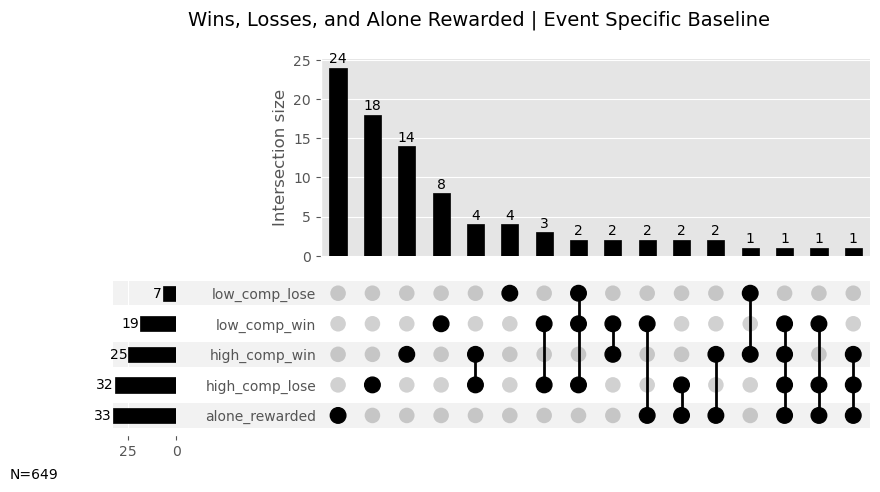

c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].f

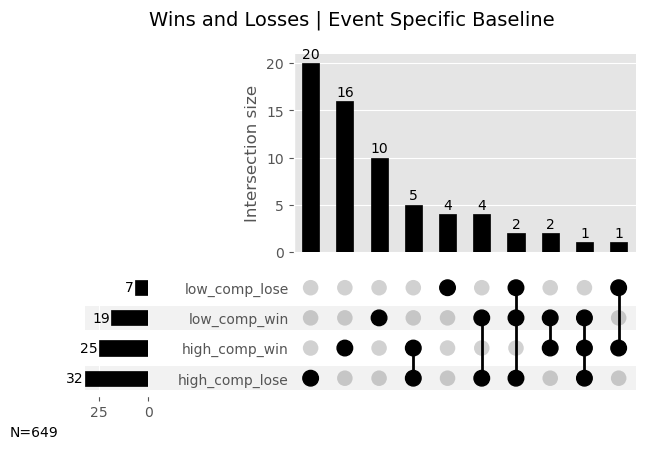

In [219]:
# alone_rewarded w/ all four small ones
create_upset_plot(units_df, ['low_comp_lose', 'high_comp_lose', 'high_comp_win', 'low_comp_win', 'alone_rewarded'], 
                  title="Wins, Losses, and Alone Rewarded | Event Specific Baseline")

# just all four small ones 
create_upset_plot(units_df, ['low_comp_win', 'high_comp_win', 'low_comp_lose', 'high_comp_lose'], 
                  title="Wins and Losses | Event Specific Baseline")


## Taking out sessions that don't have alone_rewarded so we have fair comparison

In [220]:
units_df.head()

,Recording,Event name,Unit number,Event Z-Score,sig,Event windows
15,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,232,3.047514,increase,40
59,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp,232,1.668002,increase,9
62,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp,65,1.878280,increase,9
78,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp_lose,211,1.835667,increase,1
125,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,high_comp_win,232,1.897931,increase,8


In [221]:
# dataframe without alone_rewarded event
units_df_no_alone_rewarded_recs = pd.read_csv(r"C:\Users\thoma\Code\ResearchCode\diff_fam_social_memory_ephys\other_peoples_sutff\Thomas\reward_comp\outputs\zscores_event_specific_standardway_some.csv")
units_df_no_alone_rewarded_recs.head(5)

,Recording,Event name,Unit number,Pre-event M,Pre-event SD,Event M,Event Z-Score,sig,Event windows
0,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,104,0.075,0.098058,0.075,0.000000,not sig,40
1,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,11,0.250,0.263117,0.270,0.076012,not sig,40
2,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,122,0.060,0.103280,0.185,1.210307,not sig,40
3,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,125,0.745,0.441414,0.690,-0.124600,not sig,40
4,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,126,4.010,1.378182,3.215,-0.576847,not sig,40


c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].f

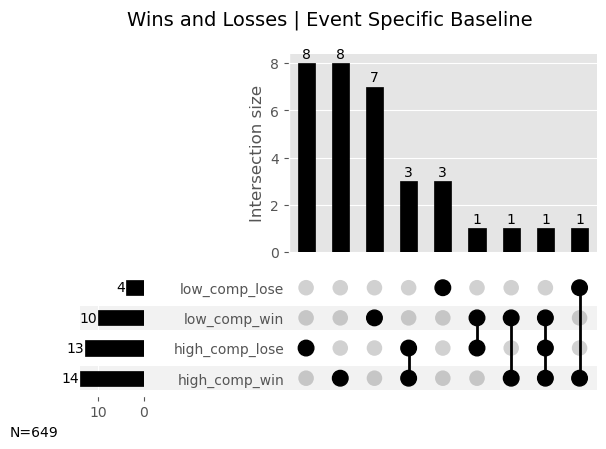

c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].f

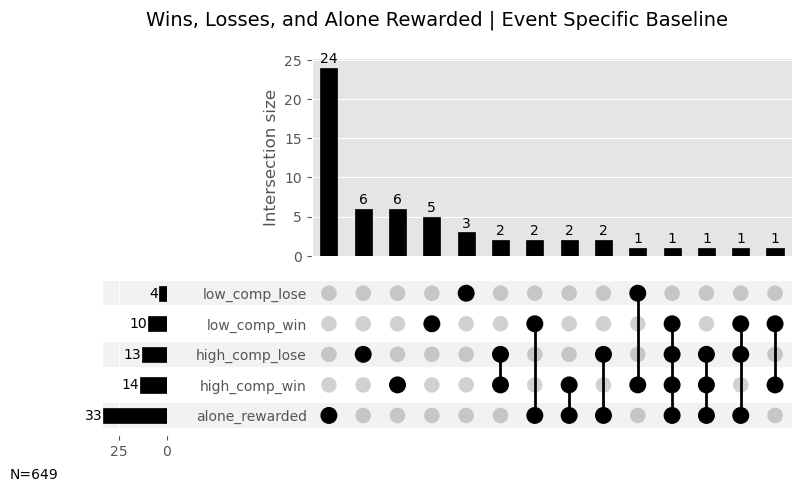

In [222]:
# just all four small ones 
create_upset_plot(units_df_no_alone_rewarded_recs, ['low_comp_win', 'high_comp_win', 'low_comp_lose', 'high_comp_lose'], 
                  title="Wins and Losses | Event Specific Baseline")

# alone_rewarded w/ all four small ones
create_upset_plot(units_df_no_alone_rewarded_recs, ['low_comp_lose', 'high_comp_lose', 'high_comp_win', 'low_comp_win', 'alone_rewarded'], 
                  title="Wins, Losses, and Alone Rewarded | Event Specific Baseline")
